In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


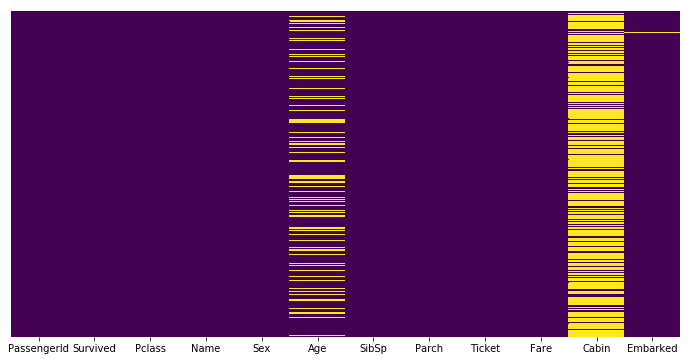

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [15]:
sns.set_style('whitegrid')

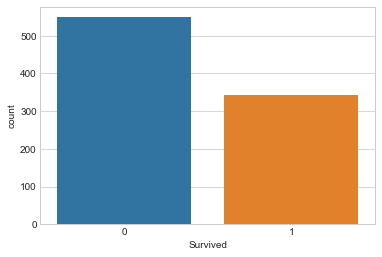

In [16]:
sns.countplot(x='Survived', data=train) # we had more data of non-survivors than the survivors

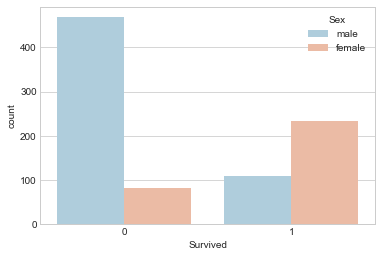

In [19]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r') 

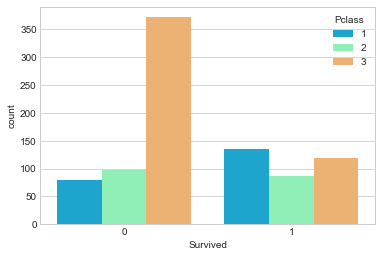

In [22]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow') 

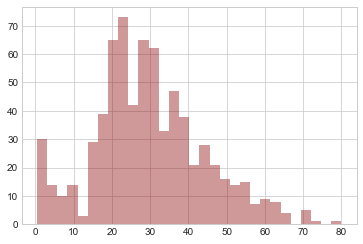

In [24]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4)

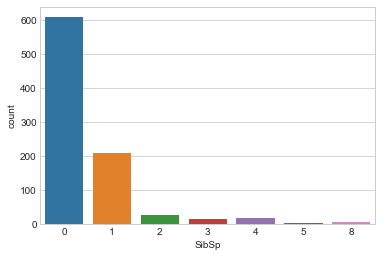

In [26]:
sns.countplot(x='SibSp', data=train)

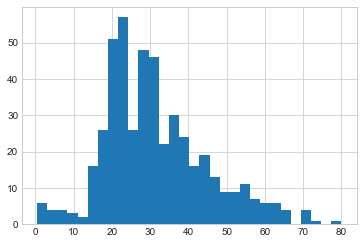

In [28]:
train[train['SibSp']==0]['Age'].hist(bins=30)

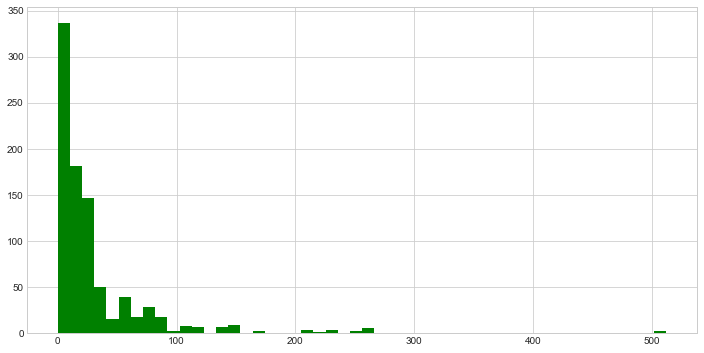

In [34]:
train['Fare'].hist(color='green', bins=50, figsize=(12, 6))

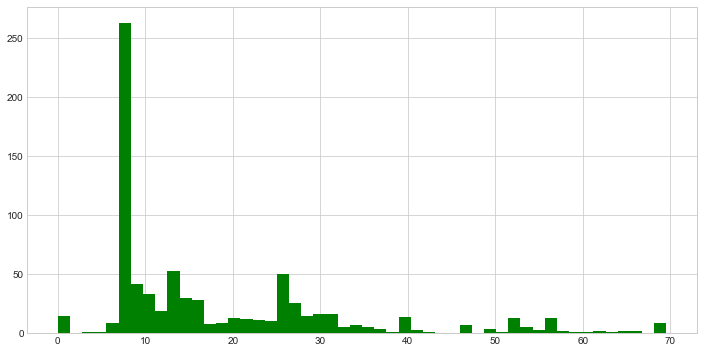

In [35]:
train[train['Fare'] < 70]['Fare'].hist(color='green', bins=50, figsize=(12, 6))

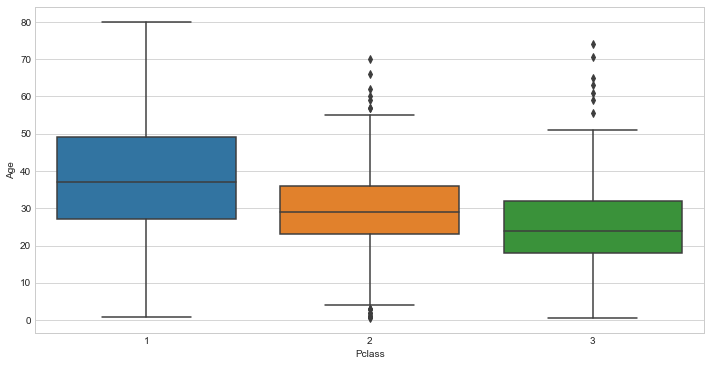

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [47]:
def inputar_idade(cols) :
    Idade = cols[0]
    Class = cols[1]
    
    if pd.isnull(Idade) :
        if Class == 1 :
            return 37
        elif Class == 2 :
            return 29 
        else :
            return 24
    else :
        return Idade

In [49]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

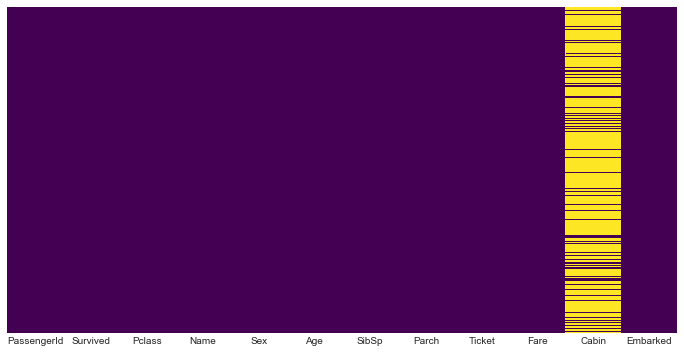

In [50]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [53]:
del train['Cabin']
# train.drop('Cabin', inplace=True)

KeyError: 'Cabin'

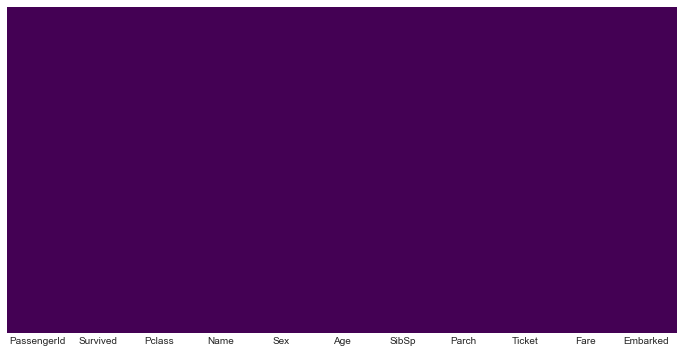

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [56]:
train.dropna(inplace=True)

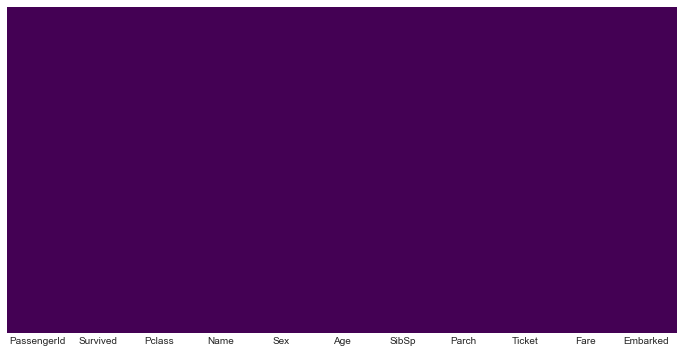

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [60]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [61]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [66]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [68]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [70]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

ValueError: labels ['Sex' 'PassengerId' 'Name' 'Ticket'] not contained in axis

In [72]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
5,0,3,24.0,0,0,8.4583,Q
6,0,1,54.0,0,0,51.8625,S
7,0,3,2.0,3,1,21.0750,S
8,1,3,27.0,0,2,11.1333,S
9,1,2,14.0,1,0,30.0708,C


In [73]:
train = pd.concat([train, sex, embark], axis=1)

In [74]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1
5,0,3,24.0,0,0,8.4583,Q,1,1,0
6,0,1,54.0,0,0,51.8625,S,1,0,1
7,0,3,2.0,3,1,21.0750,S,1,0,1
8,1,3,27.0,0,2,11.1333,S,0,0,1
9,1,2,14.0,1,0,30.0708,C,0,0,0


In [75]:
del train['Embarked']

In [76]:
train.head(30)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
 X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [81]:
logmodel = LogisticRegression()

In [82]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
predctions = logmodel.predict(X_test)

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, predctions))

             precision    recall  f1-score   support

          0       0.86      0.92      0.89       165
          1       0.85      0.75      0.80       102

avg / total       0.85      0.85      0.85       267



In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
print(confusion_matrix(y_test, predctions))

[[151  14]
 [ 25  77]]
